#  <a style="color:#00925B"> DataCamp Project - Tmall/Double11 - Predict the repeat buyers </a>

### Authors  : Ling JIN - Mingxing DU - Rui YUAN - Mariam BARRY - Yu LI - Yanlin DU

 M2 DataScience - Université ParisScalay
 
Professors :  Alexandre GRAMFORT & Balazs KEGL


##  <a style="color:#00925B"> 1. Business case</a>

- Introduction
- China 'Double 11' single day promotion 
- Business model, Metric
- Data description


## <a style="color:#00925B">2. Exploratory data analysis</a>

- Overall statistics 
- Data visualization


##  <a style="color:#00925B">3. Baseline model</a>

- Features engineering
- Baseline Classifier (Neural Network, Incremental Learning)

##  <a style="color:#00925B">4. Submit on RAMP</a>

##  <a style="color:#00925B">5. Hints for features engineering and classifier</a>

A KDD reserach paper related to our business-case.
http://www.kdd.org/kdd2016/papers/files/adf0160-liuA.pdf

# <a style="color:#00925B"> 1. Business case </a>


##  <span style="color:#00925B"> 1.1 Introduction  </span> 

Merchants sometimes run big promotions (e.g., discounts or cash coupons) on particular dates (e.g., Boxing-day Sales, "Black Friday" or "Double 11 (Nov 11th)”, in order to attract a large number of new buyers. Unfortunately, many of the attracted buyers are one-time deal hunters, and these promotions may have little long lasting impact on sales. What's more, Tmall.com as the creator of Chinese shopping carnival "Double 11 (Nov 11th)” is threatening by other e-commercial companies like Jingdong, Suning, which resluts in an increasingly high customer churn rate. As more and more customers involving in this shopping festival and more and more competitions appearing in the market, Tmall.com has to reinforce user loyalty to avoid customer loss.


It is well known that in the field of **online advertising, customer targeting is extremely challenging, especially for fresh buyers**. However, with the long-term user behavior log accumulated by Tmall.com, we may be able to solve this problem using Machine learning models.


##  <span style="color:#00925B"> 1.2 China 'Double 11' single day promotion  </span> 

On Singles' Day 2017 (Double 11), Alibaba earned US dollar 25.3 billion in 24 hours and set a world record for most payment transactions during the festival. Its mobile wallet app Alipay processed 256,000 payment transactions per second. A total of 1.48 billion transactions were processed by Alipay in the entire 24 hours and at least 331 million packages were handled by Chinese postal and courier companies on Saturday, 31.5% more than the same day last year, the State Post Bureau said. And 90% of total sales this year were made on mobile devices, up from 82% in 2016, Alibaba said. With the first 52 seconds of November 12th 2016, the turnover on Tmall arrived at 150 million US$. A first delivery even closed in 13 minutes. In 2017, total sales on Tmall Double 11 Shopping Festival reached 26.6 billion US dolar in 2017 from 225 countries and regions, 90% from mobile and 167 merchants each has total transactions of over 15.8 million US dollar. 


Read more: https://www.chinainternetwatch.com/22791/double-11-2017/#ixzz54tyFBb6a

Here's a look at how much sales have grown for Alibaba on the shopping holiday over the years, in comparison to Cyber Monday and Black Friday's online sales. 

In [1]:
## Source http://www.businessinsider.fr/us/singles-day-is-chinas-cyber-monday-2016-11/
from IPython.display import Image
source = 'http://static6.businessinsider.com/image/5818df74b28a64a26a8b4dd8-1022/screen%20shot%202016-11-01%20at%202.30.01%20pm.png'
Image(url = source, width=700, height=200)


##  <span style="color:#00925B"> 1.3 Business model  </span> 

### Business problem

As more and more customers involving in this shopping festival (double 11 promotion) and more and more competitions appearing in the market, Tmall.com has to reinforce user loyalty to avoid customer loss. Both the merchants and Tmall.com have make great efforts on the promotion day. The merchants offer a great discount on all the products to attract new clients on that special day. But the most important is to make them become repeated customers so as to increase the profit in a long term. But the problem is after the big promotion, not many new customers would stay and be transfered to repeat buyers. To alleviate this problem, **it is important for merchants to provide personalized service and promotion to different clients**. 

On the one hand, it's necessary to identify early who is at risk to leave so as to segment the campaigns to re-engage these clients effectively and in time because it is more expensive and time-consuming acquiring new customers than retaining old ones. This approach is significant for e-commerce companies. Getting new customers always demand a lot of marketing efforts, the merchant has to show trustworthy to potential consumers before they think of clicking the “buy it” button. It generally takes time. Old customers are familiar with the store, they have all the convenience of coming back there without the need of registering on the website or find the store among millions stores since they have already gone through it on their first purchase.

On the other hand, It's also important to identify who can be converted into repeat buyers. **By targeting on these potential loyal and repeat customers, merchants can greatly reduce the promotion cost and enhance the return on investment (ROI)**.
By analysing and modeling on customers' behavior dataset, Tmall.com aims to segment potential repeat buyers and buyers who are going to leave in order to increase user loyalty and prevent customer churn.

### User of our solution 

Our model is aimed to the merchants on the platform Tmall.com. According to statistic results, there are more than 18 millions stores on Tmall.com in 2017.

Note that our prediction model might be adapted to others business-case.

### Source of income of the clients:

The income of our merchants is from the profits of selling goods online. The merchants tend to choose the strategy of providing promotions to attract new customers, in which way, it is expected to achieve the mode of small profits and quick returns. And once new customers become loyal to some shop, the merchants will even profit more at ordinay times without promotion. 


### Prediction task

We provide a set of merchants and their corresponding new buyers acquired during the promotion on the "Double 11" day. Your task is to predict for given merchants, which new buyers will not repurchase, while which new buyers will become loyal customers in the future. In other words, you need to predict whether these new buyers would purchase items from the same merchants again within 6 months. The goal is to do customer segmentation. To classfier new clients to potential repeat buyers and potential churned customers. The result may lead to a better distribution of promotion resource for each store, thus each store can better choose target clients. **This case is a binary classification problem where, given a pair of merchant and client, the target is to predict whether this given client is a repeated buyer for this specific merchant or not.**


### Hypotheses

- Potential loyal clients will reperchase at least once in the next six month. Suppose that merchandises continue to make promotions during the year, precise and accurate target loyal clients can garantee revenues and even stimulate more their interest of shopping. For those potential repeat buyers, the merchants can reduce their future discount  since they will repurchase after all. They can accumulate the amount that a client has bought in the store, then tranfer those with an amout above a certain level to VIP customers. While for those one-time deal buyers, merchantises should aujust promotion strategies which is different from that for loyal clients, such as giving coupons for the next purchase or a higher discount rate.


- Promotion cost: The merchants apply to the platform to participate in the pomotion, which is also a commitment to give discount on the articles. Suppose that for a round of promotion, the cost depends on the number of clients applied to. 


### Business metrics 


**True Positive**: Succeffsully identifying those who will repurchase, preventing unnecessary investment on those buyers.

**True Negative**: Successfully identifying those who are possible to leave, the merchant makes a better distribution of promotion resource so as to make those clients stay and maximize profits.

**False Positive**: Wrongly identifying a client as repeat buyer while he/she is going to leave the store, causing potential loss of clients.

**False Negative**: Wrongly identifying a repeated client as a potential churn client, causing unnecessary promotion, waste of resource.

Suppose that a margin of a transformed client is 5, a promotion cost per client is 1. The transformation probability is 0.3. We define gains of each metric above:
- cfn = FN * margin per client - FN * promotion per client
- cfp = - FP * probability * margin per client
- ctn = TN * probability*margin per client - TN * promotion per client
- ctp = TP * margin per client

$$\text{business metric} = \frac{cfp*FP + cfn*FN + ctp*TP + ctn*TN}{TP+TN+FP+FN}$$



### Benefits of DataScience/Machine Learning solution

- Exploit the huge amount of raw dataset to thrive the Business
- Reinforce user loyalty to avoid customer loss
- Implement the customer segmentation to better target relevant customers and then make the corresponding promotion  
- Make the best use of promotion expenses which is constant in allocating the promotion ressources in order to get the maximum profits in the long term
- Predictions will also determine the demand size which indicate the consumption trend so that the merchant will know how to stock the goods and won’t buy less or more than the customer demand
- Update the stock and the store logistic ressources based on the prediction of customers behavior and sales


### Data description

The data set contains anonymized users' shopping logs in the past 6 months before and on the "Double 11" day, and the label information indicating whether they are repeat buyers. Due to privacy issue, data is sampled in a biased way, so the statistical result on this data set would deviate from the actual of Tmall.com. But it will not affect the applicability of the solution. The files for the training and testing data sets can be found in "data_format2.zip". Details of the data format can be found in the table below. **Due to the size of the original dataset, we resample the data from 'data_format2.zip'** as 'train.csv' and 'test.csv'.Then apply it in our baseline model. Based on these two '.csv' files, we do some transformation and get 'train.csv' and 'test.csv' in order to obtain the better analysis of data in the section of data visulization.

**Data are downloaded from** a Chinese Kaggle website.
Source : https://tianchi.aliyun.com/getStart/information.htm?spm=5176.100067.5678.2.274d6bb1eahGbL&raceId=231576

In [2]:
import pandas as pd
data = pd.read_csv('data/train.csv',sep=',')
data.head()

,user_id,age_range,gender,merchant_id,activity_log,label
0,177329,4.0,0.0,2360,397865:1331:7711:1111:0#464621:1331:7711:1111:...,0
1,233930,4.0,0.0,2891,435117:1414:6371:1111:2#435117:1414:6371:1111:0,0
2,229696,0.0,0.0,798,30536:1657:385:1111:2#384969:1580:385:1111:2#2...,0
3,25126,3.0,0.0,4171,482515:1401:2828:1111:2#482515:1401:2828:1111:...,0
4,64312,0.0,0.0,3473,1029252:656:3305:1110:0#1029252:656:3305:1109:...,0


**user_id:** a unique id for the shopper

**age_range:** user' s age range represented as 9 types from 0 to 8, where 0 means that the age is unknown; 1 for $age<18$; 2 for $age\in[18,24]$; 3 for $age\in[25,29]$; 4 for $age\in[30,34]$; 5 for $age\in[35,39]$; 6 for $age\in[40,49]$; 7 and 8 for $age\geq 50$.  

**gender:** user' s gender where 0 for female, 1 for male, 2 for unknown.

**merchant_id:** a unique id for the merchant

**activity_log:** set of interaction records between {user_id, merchant_id}, where each record is an action represented as 'item_id:category_id:brand_id:time_stamp:action_type' . ' #' is used to separate two neighbouring elements. Records are not sorted in any particular order. The action type is from {0, 1, 2, 3}, where 0 is for click, 1 is for add-to-cart, 2 is for purchase and 3 is for add-to-favourite.

**label:** value from {0, 1}. ' 1' denotes ' user_id' is a repeat buyer for ' merchant_id' , while ' 0' is the opposite. 

#  <a style="color:#00925B"> 2.  Exploratory data analysis </a>



## Data exploration

### Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
%matplotlib inline
import datetime

### Load the training data

- Each row is a record of the interactions between a pair of User and Merchant.
- Each pair is unique.
- Label 0 means this User is not a repeat buyer at this Merchant, Label 1 means this User is a repeat buyer at this Merchant.
- Other columns will be detailly explained later.

In [3]:
data.head()

,user_id,age_range,gender,merchant_id,activity_log,label
0,177329,4.0,0.0,2360,397865:1331:7711:1111:0#464621:1331:7711:1111:...,0
1,233930,4.0,0.0,2891,435117:1414:6371:1111:2#435117:1414:6371:1111:0,0
2,229696,0.0,0.0,798,30536:1657:385:1111:2#384969:1580:385:1111:2#2...,0
3,25126,3.0,0.0,4171,482515:1401:2828:1111:2#482515:1401:2828:1111:...,0
4,64312,0.0,0.0,3473,1029252:656:3305:1110:0#1029252:656:3305:1109:...,0


In [4]:
data.dtypes

user_id           int64
age_range       float64
gender          float64
merchant_id       int64
activity_log     object
label             int64
dtype: object

In [5]:
# NA counts
data.isnull().sum()

user_id           0
age_range       236
gender          724
merchant_id       0
activity_log      0
label             0
dtype: int64

#### Note that there are NA values for column age_range and gender. We fill the NA of age_range with 0, fill the NA of gender with 2. Because for column age_range 0 means unknown, for column gender 2 means unknown.

In [6]:
data['gender'] = data['gender'].fillna(2)
data['age_range'] = data['age_range'].fillna(0)
# NA counts
data.isnull().sum()

user_id         0
age_range       0
gender          0
merchant_id     0
activity_log    0
label           0
dtype: int64

Column Gender
Unique value : [0. 1. 2.]
Number of unique values : 3
0: Female, 1: Male, 2: Unknown


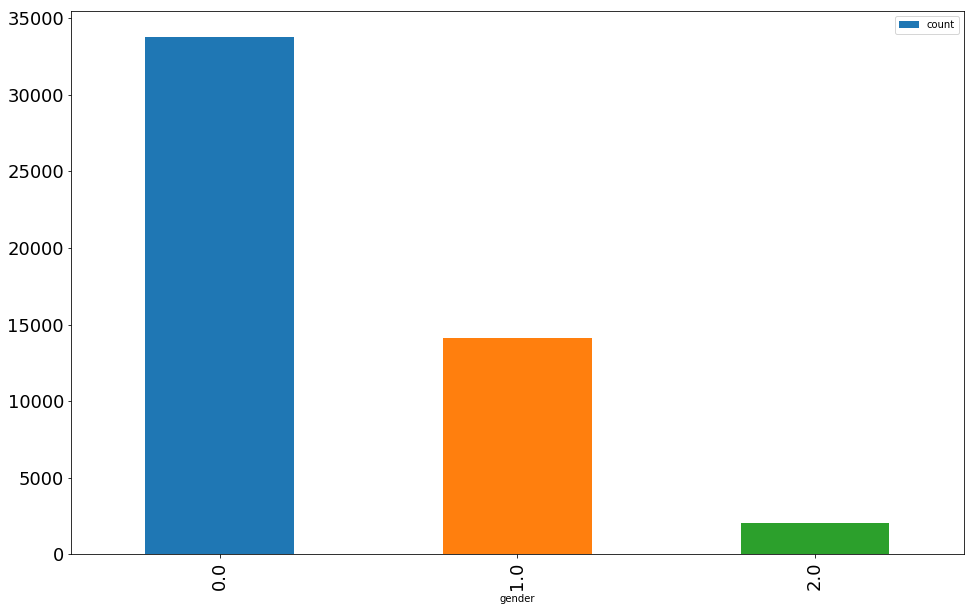

In [10]:
print('Column Gender')
print('Unique value : {}'.format(data['gender'].unique()))
print('Number of unique values : {}'.format(len(np.unique(data['gender']))))
print('0: Female, 1: Male, 2: Unknown')
data.groupby('gender').count()[['label']].sort_values(
    'label', ascending=False).reset_index().rename(
    columns={'label': 'count'}).plot.bar(
    x='gender', y='count', figsize=(16, 10), fontsize=18);

Column Age_range
Unique value : [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Number of unique values : 9
0: Unknown, 1: <18, 2: 18-24, 3: 25-29, 4: 30-34, 5: 35-39, 6: 40-49, 7&8: >=50


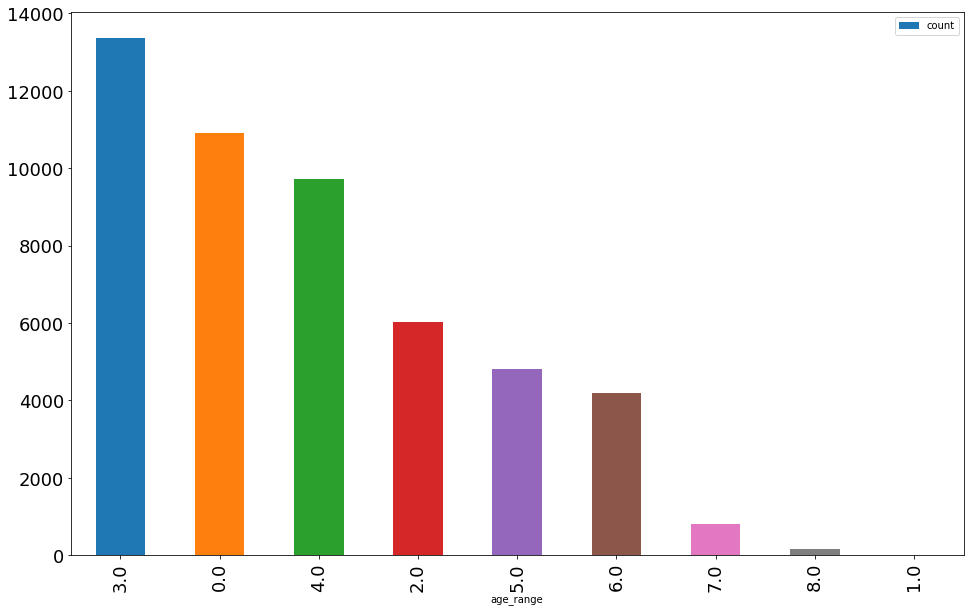

In [11]:
print('Column Age_range')
print('Unique value : {}'.format(np.sort(data['age_range'].unique())))
print('Number of unique values : {}'.format(len(np.unique(data['age_range']))))
print('0: Unknown, 1: <18, 2: 18-24, 3: 25-29, 4: 30-34, 5: 35-39, 6: 40-49, 7&8: >=50')
data.groupby('age_range').count()[['label']].sort_values(
    'label', ascending=False).reset_index().rename(
    columns={'label': 'count'}).plot.bar(
    x='age_range', y='count', figsize=(16, 10), fontsize=18);

Column Label
Unique value : [0 1]
Number of unique values : 2
0: One time buyer, 1: Repeat buyer


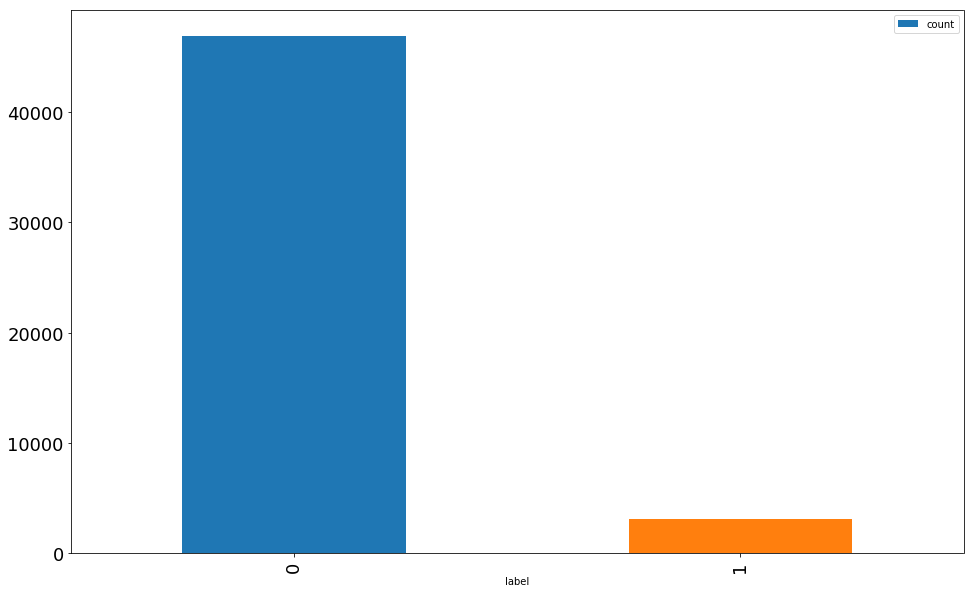

In [9]:
print('Column Label')
print('Unique value : {}'.format(np.sort(data['label'].unique())))
print('Number of unique values : {}'.format(len(np.unique(data['label']))))
print('0: One time buyer, 1: Repeat buyer')
data.groupby('label').count()[['age_range']].sort_values(
    'age_range', ascending=False).reset_index().rename(
    columns={'age_range': 'count'}).plot.bar(
    x='label', y='count', figsize=(16, 10), fontsize=18);

$\textbf{Important Note :}$ We can see that the dataset is highly unbalanced, more adapted classifier is needed.

### Activity_log,  <b><span style="color:red">most informative part, and where feature engineering is needed</span></b>, it's the set of interaction records between {user, merchant}, where each record is an action represented as :
- $\textbf{item_id:category_id:brand_id:time_stamp:action_type}$ . 
- $\textbf{'#'}$ is used to separate two neighbouring elements. Records are not sorted in any particular order.

### To have a closer look at this log, let's first extract it into several columns : $[item\_id, category\_id, brand\_id, time\_stamp, action\_type]$



In [59]:
# extend act log into several columns
act_log = []
for i in range(len(data)):
    logs = (list(data.loc[i])[4]).split('#')
    label = data.loc[i][5]
    for l in logs:
        act_log.append(l.strip().split(':')+[label])
act_log = pd.DataFrame(act_log, columns = ['item_id', 'category_id', 'brand_id', 'time_stamp', 'action_type', 'label'],
                       dtype='category')
act_log.describe()

,item_id,category_id,brand_id,time_stamp,action_type,label
count,538694,538694,538694,538694,538694,538694
unique,74835,894,2623,185,4,2
top,191499,662,82,1111,0,0
freq,1426,29052,18094,315542,452861,488149


Action_type summary
Unique value : ['0' '1' '2' '3']
Number of unique values : 4
0 for click, 1 for add-to-cart, 2 for purchase, 3 for add-to-favourite


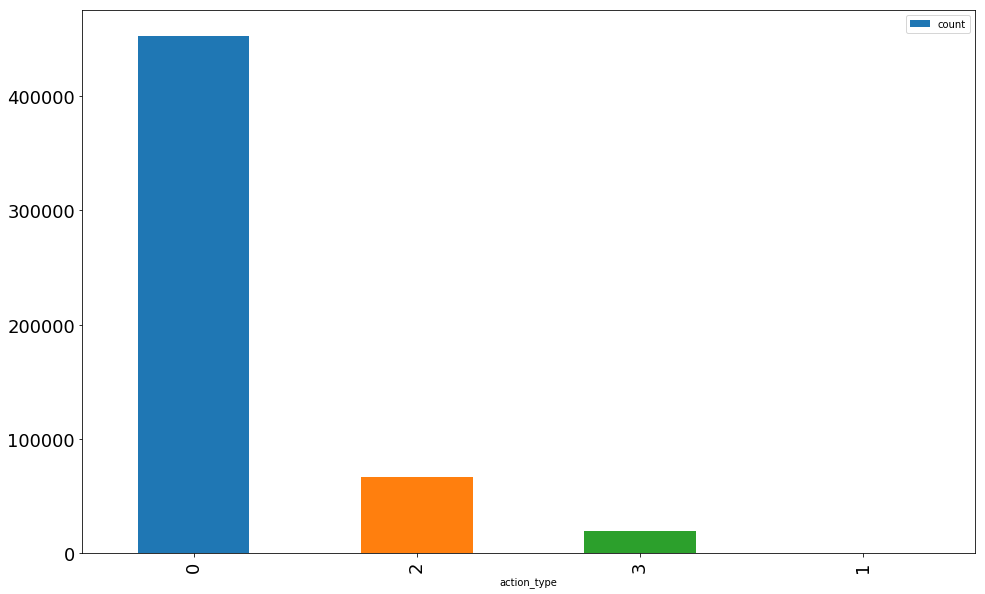

In [13]:
print('Action_type summary')
print('Unique value : {}'.format(np.sort(act_log['action_type'].unique())))
print('Number of unique values : {}'.format(len(np.unique(act_log['action_type']))))
print('0 for click, 1 for add-to-cart, 2 for purchase, 3 for add-to-favourite')
act_log.groupby('action_type').count()[['time_stamp']].sort_values(
    'time_stamp', ascending=False).reset_index().rename(
    columns={'time_stamp': 'count'}).plot.bar(
    x='action_type', y='count', figsize=(16, 10), fontsize=18);

Time_stamp summary
Number of unique values : 185


1111    315542
1110     64545
1109     21718
1108     14928
1107     12183
1106     11246
1105      9404
1104      7941
1103      6342
1102      6220
1101      6064
1031      4562
1030      3774
1029      2062
1028      1738
1027      1490
1026      1264
1024      1223
1021      1150
1022      1139
1023      1100
1025      1046
1018       895
1019       894
1016       820
1017       819
1014       770
1020       769
0626       728
0909       689
         ...  
0712       128
0602       127
0603       124
0608       124
0606       124
0610       123
0708       121
0703       121
0720       120
0802       120
0611       118
0713       117
0819       117
0817       115
0812       104
0704       103
0804       103
0709        92
0811        89
0612        82
0714        63
0513        17
0512        14
0517        13
0515        13
0516        12
0519        10
0518        10
0511         9
0514         7
Name: time_stamp, Length: 185, dtype: int64

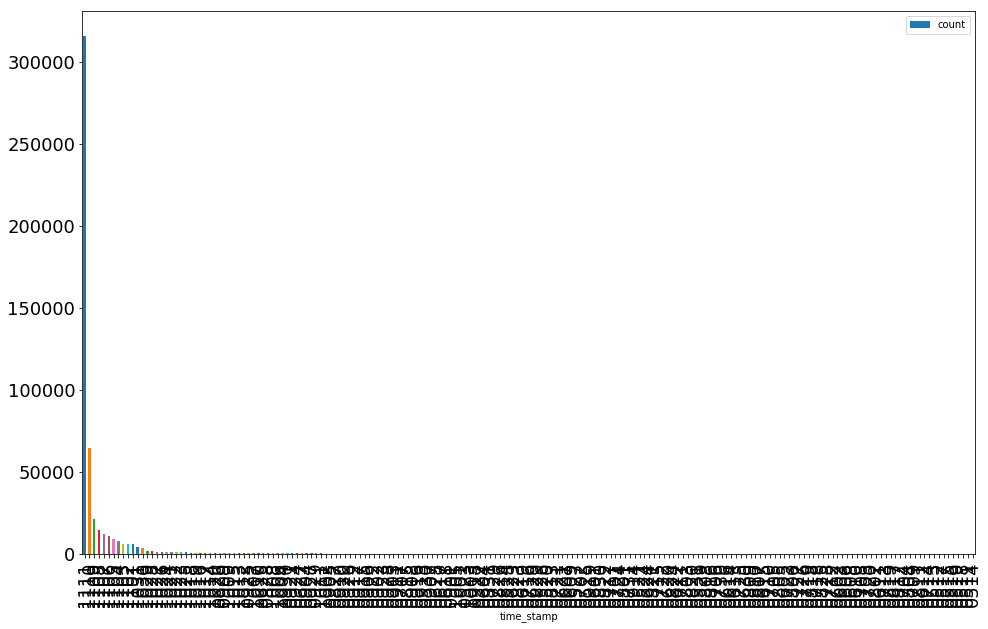

In [36]:
print('Time_stamp summary')
print('Number of unique values : {}'.format(len(np.unique(act_log['time_stamp']))))
act_log.groupby('time_stamp').count()[['action_type']].sort_values(
    'action_type', ascending=False).reset_index().rename(
    columns={'action_type': 'count'}).plot.bar(
    x='time_stamp', y='count', figsize=(16, 10), fontsize=18);
act_log['time_stamp'].value_counts()

Category_id summary
Number of unique values : 894


662     29052
1142    26364
389     24060
656     19395
737     14000
602     13894
664     10695
1505    10253
1095     9595
1553     9570
1438     9569
1188     9123
177      9098
1611     8402
898      8281
946      7629
1238     7618
1577     7423
420      7350
1075     7301
276      7153
1023     7093
1401     6846
351      6645
1389     6528
1181     5811
748      5784
1213     5781
1112     5314
407      5199
        ...  
1281        1
127         1
1266        1
1176        1
1178        1
1241        1
124         1
1217        1
1555        1
1556        1
161         1
1623        1
501         1
470         1
406         1
397         1
379         1
342         1
251         1
248         1
234         1
221         1
214         1
21          1
207         1
201         1
1125        1
174         1
1671        1
258         1
Name: category_id, Length: 894, dtype: int64

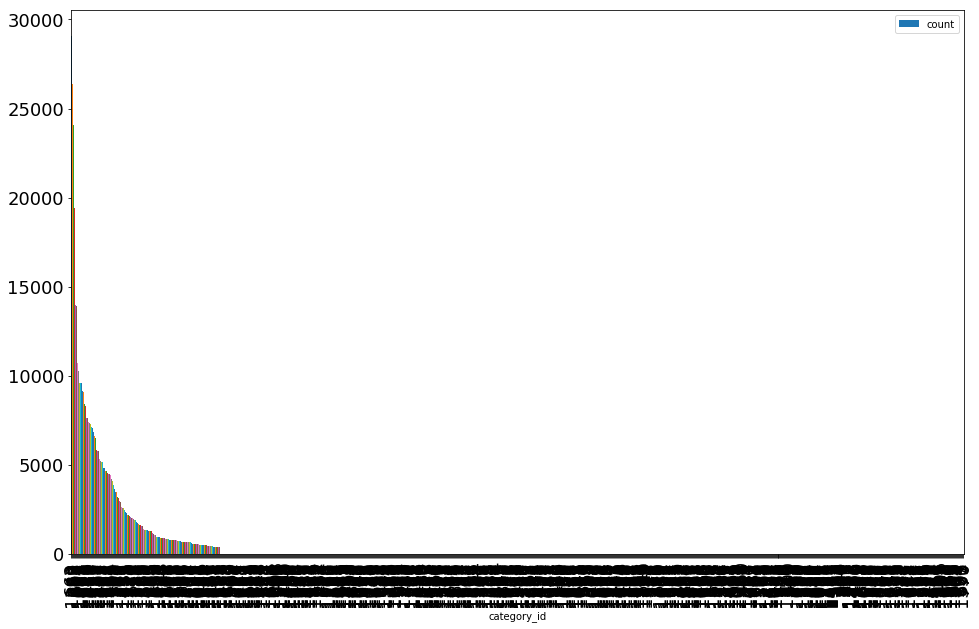

In [15]:
print('Category_id summary')
print('Number of unique values : {}'.format(len(np.unique(act_log['category_id']))))
act_log.groupby('category_id').count()[['action_type']].sort_values(
    'action_type', ascending=False).reset_index().rename(
    columns={'action_type': 'count'}).plot.bar(
    x='category_id', y='count', figsize=(16, 10), fontsize=18);
act_log['category_id'].value_counts()

Brand_id summary
Number of unique values : 2623


82      18094
1214    14300
1446    14127
5376    11020
6585     7529
4705     7118
6143     6413
7892     5872
376      5613
4290     4183
2045     4129
385      3902
8351     3869
8417     3473
2337     3376
7995     3360
4014     3358
247      3354
5735     3207
3614     2911
6109     2872
6445     2832
7931     2690
3091     2538
2240     2503
6595     2498
4276     2471
2276     2468
7606     2466
8235     2464
        ...  
8220        1
5036        1
7965        1
6564        1
23          1
6529        1
2269        1
2225        1
6486        1
8023        1
647         1
2155        1
2124        1
4799        1
6428        1
6424        1
6413        1
2012        1
4878        1
4881        1
6395        1
4906        1
6373        1
1951        1
1931        1
1926        1
635         1
8161        1
8194        1
6504        1
Name: brand_id, Length: 2623, dtype: int64

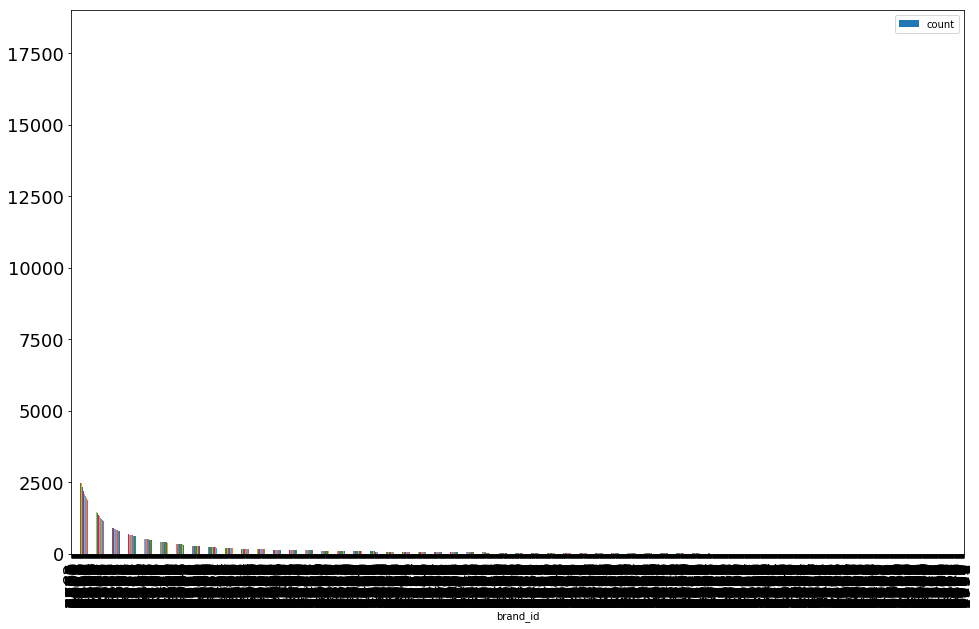

In [16]:
print('Brand_id summary')
print('Number of unique values : {}'.format(len(np.unique(act_log['brand_id']))))
act_log.groupby('brand_id').count()[['action_type']].sort_values(
    'action_type', ascending=False).reset_index().rename(
    columns={'action_type': 'count'}).plot.bar(
    x='brand_id', y='count', figsize=(16, 10), fontsize=18);
act_log['brand_id'].value_counts()

### From above counts and plots, we can observe:
- $item\_id$ are abandant, it might be more informative to take category and brand into account.
- $time\_stamp$, $brand\_id$ and $category\_id$ have tail distribution, meaning that most of the elements have extremly low frequent. This implies that we could group those elements, since a such single element is meaningless.



#  <a style="color:#00925B"> 3. Baseline model</a>



## Features extractor

To begin with the problem, below is the list of features we have build :

- **age_range** : dummy coding for age_range
- **gender** : dummy coding for gender
- **merchant_return_rate** : for a merchant we calculate his total return rate of clients (to indicate if the clients are more likely to comeback in this merchant store)
- **user_return_rate** : for a user we calculate his return rate (to indicate if the client is more likely to be a repeat buyer)
- **log_features** : These features are **generated from the activity_log column where the most effort is needed for features engineering**. We propose following features which correspond about 300 columns 
    - binary features which indicate if a given brand or category are more likely to have repeat buyers 
    - counts of different action types along different months and different days.
    


In [10]:
%%file submissions/starting_kit/feature_extractor.py
import pandas as pd
import numpy as np
from collections import defaultdict

def fill_na(X_df):
    X_df['gender'].fillna(2)
    X_df['age_range'].fillna(0)
    return X_df

def compute_positive_rate(X, col, MIN_COUNT):
    ''' MIN_COUNT: we compute the rate for at least MIN_COUNT occurrences, 
    since if an item appears only once and it's a repeat buyer, we can hardly say the return rate is 100% '''
    # approximately 150 seconds
    group = X.groupby(col)
    group_count = group.count()['label']
    min_count = group_count < MIN_COUNT
    group_count[min_count] = 1.0
    group_posi = group.sum()['label']
    group_posi[min_count] = 0.5
    #return defaultdict(lambda:0.5, [(str(index), group_posi[index]/group_count[index]) for index in group_posi.index])
    return group_posi / group_count
    
def compute_index(rate, TOP=20):
    LAST = 100 - TOP
    rate_index = list(rate.sort_values(ascending=False).index)
    rate_index = dict(zip(rate_index[0:TOP] + rate_index[-LAST:], np.arange(100)))
    return rate_index

def expand_act_log(X_df):
    act_log = []
    for i in range(len(X_df)):
        logs = X_df.loc[i][4].split('#')
        label = X_df.loc[i][5]
        user_id = X_df.loc[i][0]
        merchant_id = X_df.loc[i][3]
        for l in logs:
            act_log.append([user_id]+[merchant_id]+l.strip().split(':')+[label])
    act_log = pd.DataFrame(act_log, columns = ['user_id', 'merchant_id', 'item_id', 'category_id', 'brand_id', 'time_stamp', 'action_type', 'label'],
                       dtype='category')
    return act_log

def log2feature(act_log, rate_brand_index, rate_cate_index, index_dates):
    n = len(act_log)
    p = len(rate_brand_index)
    q = len(rate_cate_index) # by default p+q it's 200
    features = np.zeros((n,p+q + 68)) # 68=17*4, corresponding to 6 months and 11 days of November, each date has 4 action types 
    brand_keys = rate_brand_index.keys()
    cate_keys = rate_cate_index.keys()
    dates_keys = index_dates.keys()
    for i, log in enumerate(act_log):
        acts = log.split('#')
        for act in acts:
            _, cate, brand, date, act_type = act.strip().split(':')
            if str(brand) in brand_keys:
                features[i][rate_brand_index[str(brand)]] +=1
            if str(cate) in cate_keys:
                features[i][p+rate_cate_index[str(cate)]] +=1
            if str(date) in dates_keys:
                features[i][p+q+index_dates[str(date)]+int(act_type)] +=1 
    return features

def generate_dates():
    months = ['05', '06', '07', '08', '09', '10'] # we can observe that data begins from May until 11 November 
    index_dates = {}
    for i,m in enumerate(months):
        for j in range(31):
            index_dates[m + str(j+1).zfill(2)] = i*4
    for i in range(11):
        index_dates['11'+ str(i+1).zfill(2)] = (6+i)*4
    return index_dates
        
    
class FeatureExtractor():
    def __init__(self, MIN_COUNT=6):
        self.merchant_return_rate = None # return rate for each merchant, eg: for a merchant i, the percentage of repeated client
        self.user_return_rate = None # return rate for each client, eg: for a client i, the percentage of being a repeated client
        self.rate_brand_index = None # top return rate brands, eg: the first brand is the one which has a highest percentage of repeated client
        self.rate_cate_index = None # top return rate categorys, eg: the first category is the one which has a highest percentage of repeated client
        self.act_log = None # extract the act log from the raw data
        self.age_dummy = None # dummy coding age_range
        self.gender_dummy = None # dummy coding gender_range
        self.index_dates = None # we count the different action types for different dates
        self.MIN_COUNT = MIN_COUNT # minimum counts for a reliable return rate, eg: if one has only 1 count, and it is a repeated client,
    # we can't draw a conclusion that the return rate is 100%, instead we take 50% (equal chance).

    def fit(self, X_df, y=None):
        X_df = fill_na(X_df).reset_index(drop=True)
        X_df['label'] = y
        self.act_log = expand_act_log(X_df)
        self.index_dates = generate_dates()
        rate = compute_positive_rate(X_df, ['merchant_id'], self.MIN_COUNT)
        self.merchant_return_rate = defaultdict(lambda:0.5, 
                                                [(str(index), rate[index]) for index in rate.index])
        rate = compute_positive_rate(X_df, ['user_id'], self.MIN_COUNT)
        self.user_return_rate = defaultdict(lambda:0.5, 
                                                [(str(index), rate[index]) for index in rate.index])
        self.rate_brand_index = compute_index( compute_positive_rate(self.act_log, ['brand_id'], self.MIN_COUNT), 
                                              TOP=50)
        self.rate_cate_index = compute_index( compute_positive_rate(self.act_log, ['category_id'], self.MIN_COUNT), 
                                             TOP=10)
        self.age_dummy = pd.get_dummies(X_df['age_range'].astype('category')).columns
        self.gender_dummy = pd.get_dummies(X_df['gender'].astype('category')).columns

    def transform(self, X_df):
        '''
        Feature engineering: you can do your own feature engineering here 
        '''
        age = pd.get_dummies(X_df['age_range'].astype('category')).reindex(columns = self.age_dummy, fill_value = 0).as_matrix()
        gender = pd.get_dummies(X_df['gender'].astype('category')).reindex(columns = self.gender_dummy, fill_value = 0).as_matrix()
        merchant_return_rate = np.array([self.merchant_return_rate[str(id_)] for id_ in X_df['merchant_id']]).reshape(-1,1)
        user_return_rate = np.array([self.user_return_rate[str(id_)] for id_ in X_df['user_id']]).reshape(-1,1)
        log_features = log2feature(X_df['activity_log'], self.rate_brand_index, self.rate_cate_index, self.index_dates)
        
        X = np.hstack((age, gender, merchant_return_rate, user_return_rate, log_features))
        return X

Overwriting submissions/starting_kit/feature_extractor.py


## Classifier
- Given this dataset is **highly unbalanced**, traditional classifiers won't perform properly, for example, with some classical method, one might have a prediction of all 0, since the great majority of the dataset have a label of 0.

- To give a baseline, we **propose a simple neural network** with **downsample training strategy**, meaning that each time we downsample a more or less balanced dataset for training.

- For the **metrics**, one might already notice that, accuracy is meaningless, since even predicting all 0, one can still get an accuracy of 93%, to have a more meaningful metric, we **introduce ROC AUC score** from sklearn, which gives a more reasonable evaluation of our model. Note that our model is sensitive to False Negative while Precision and Recall both ignore False Negatives, so Precision, Recall and F1 are also not recommanded.

In [17]:
%%file submissions/starting_kit/classifier.py
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras.utils.np_utils import to_categorical
import pdb


def balance_batch(data, label):
    num = int((label==1).sum()*1.5)
    index_0 = np.random.choice(np.where(label==0)[0], num)
    batch = []
    batch_label = []
    for i in range(len(data)): 
        if i in index_0 or label[i]==1:
            batch.append(data[i])
            batch_label.append(label[i])
    return np.array(batch), np.array(batch_label)

class Classifier(object):
    
    def __init__(self):
        
        self.model = Sequential()
        self.model.add(Dense(units=64, activation='relu', input_dim=282))
        self.model.add(Dense(units=64, activation='relu', input_dim=50))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])
    
    def fit(self, X, y):
        
        print('Incremental training, each time we sample a balanced dataset for training:')
        num_iterations = 15
        for i in range(num_iterations):
            batch_train, batch_label = balance_batch(X, y)
            self.model.train_on_batch(batch_train, batch_label)
    
    def predict(self, X):
        return (self.model.predict(X)>=0.49).astype(int)
    
    def predict_proba(self, X):
        prob_1 = self.model.predict_proba(X)
        prob_0 = 1 - self.model.predict_proba(X)
        return np.concatenate((prob_0, prob_1), axis=1)

Overwriting submissions/starting_kit/classifier.py


#  <a style="color:#00925B"> 4. Submit on RAMP </a>

## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Classifier` to predict the target

## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `classifier.py` and `feature_extractor.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [18]:
!ramp_test_submission

Testing Taobao: Repeat Buyers Prediction
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
/Users/lingjin/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Incremental training, each time we sample a balanced dataset for training:
2018-01-30 18:50:11.081135: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
CV fold 0
	score  business_metric   acc    nll  roc_auc
	train        16751.403  0.91  0.572    0.587
	valid         4157.674  0.91  0.577    0.537
	test          4148.067  0.90  0.577    0.545
Incremental training, each time we sample a balanced d

## Submitting to [ramp.studio](http://ramp.studio)

Once you found a good feature extractor and classifier, you can submit them to [ramp.studio](http://www.ramp.studio). First, if it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login).  Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions]. You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 
```
----------------------------
train auc = 0.85 ± 0.005
train acc = 0.81 ± 0.006
train nll = 0.45 ± 0.007
valid auc = 0.87 ± 0.023
valid acc = 0.81 ± 0.02
valid nll = 0.44 ± 0.024
test auc = 0.83 ± 0.006
test acc = 0.76 ± 0.003
test nll = 0.5 ± 0.005
```
 When the score is good enough, you can submit it at the RAMP.

#  <a style="color:#00925B"> 5. Hints for features engineering and classifier </a>

This Dataset is a quite complex business case because of the raw data structure and the prediction task and it is a famous challenge which has been tried by various data scientists. We give below some hints for further users of the Starting_kit to improve the score.


- Consider other relevent metrics than F1 or accuracy due to the nature of dataset which is very unballanced

- Consider downsampling methods or outlier detection classifier

** Furthers hints - A dedicated KDD paper by a team of Singapore **

A team of Singapore from Institute of Infocomm Researd (Data analytics department) and Development Bank has published a paper on KDD related to this kind of business-case 'Repeat Buyer Prediction for E-Commerce' and this Double_11 dataset in particular. They have build relevent features engineering structure which as shown below and the results are satisfactionary. 
http://www.kdd.org/kdd2016/papers/files/adf0160-liuA.pdf

In [80]:
from IPython.display import Image
source = 'https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/ad4e5ab490886e5c9d4beddc435767923fc2d526/3-Figure1-1.png'
Image(url = source, width=800, height=300)